In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("BlackFriday.csv")

Get an overview over the age distribution, grouped by gender, city category and marital status

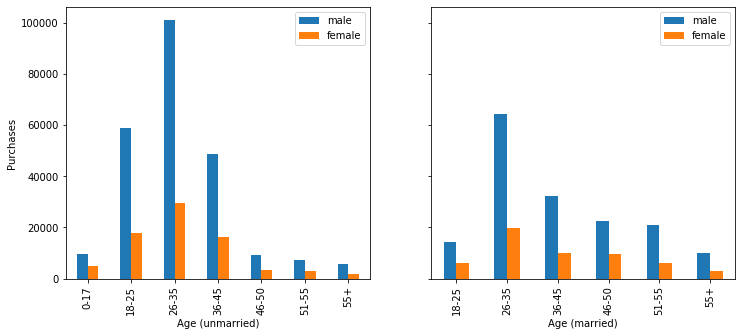

In [5]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
data_married = data[data.Marital_Status == 0]
df = pd.DataFrame({'male': pd.value_counts(data_married[data_married.Gender == 'M']['Age']).values,'female': pd.value_counts(data_married[data_married.Gender == 'F']['Age']).values}, index=pd.value_counts(data_married['Age']).index)
plot = df.sort_index().plot.bar(ax=ax)
ax.set_xlabel("Age (unmarried)")
data_married = data[data.Marital_Status == 1]
df = pd.DataFrame({'male': pd.value_counts(data_married[data_married.Gender == 'M']['Age']).values,'female': pd.value_counts(data_married[data_married.Gender == 'F']['Age']).values}, index=pd.value_counts(data_married['Age']).index)
plot = df.sort_index().plot.bar(ax=ax2)
plt.xlabel("Age (married)")
ylabel = ax.set_ylabel("Purchases")
plt.savefig('purchases_by_age.pdf', format='pdf', dpi=300, bbox_inches='tight')

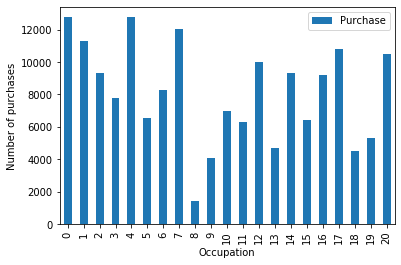

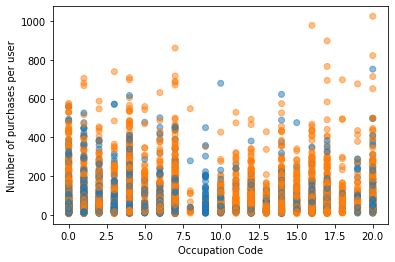

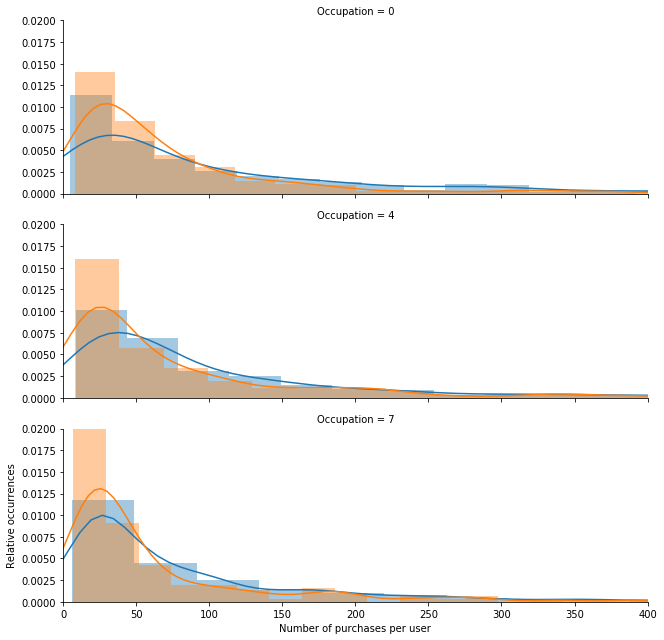

In [23]:
data.set_index(['User_ID', 'Gender', 'Age', 'Occupation'])
data_occupations = data.groupby('Occupation').nunique()
data_occupations.plot.bar(x='Occupation', y='Purchase')
plt.xticks(ticks=data_occupations.index.tolist(), labels=data_occupations.index.tolist())
ylabel = plt.ylabel("Number of purchases")
plt.savefig('purchases_by_occupation.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

cm = plt.cm.get_cmap('tab10')
data_customers = data.groupby(['User_ID', 'Gender', 'Occupation']).count().reset_index()
#print(data_customers.head())
plt.scatter(data_customers.Occupation, data_customers.Purchase, c=(data_customers.Gender=='M')*0.1, cmap=cm, alpha=0.5, vmin=0, vmax=1)
xl = plt.xlabel("Occupation Code")
yl = plt.ylabel("Number of purchases per user")
plt.savefig('purchasesperuser_by_age.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

X = data_customers[(data_customers['Occupation'] == 0) | (data_customers['Occupation'] == 4) | (data_customers['Occupation'] == 7)].copy()
g = sns.FacetGrid(X, row='Occupation', hue='Gender', aspect=3, sharey=True)
g = g.map(sns.distplot, 'Purchase', bins=20)
plt.xlim(0, 400)
plt.ylim(0, 0.02)
ylabel = plt.ylabel("Relative occurrences")
ylabel = plt.xlabel("Number of purchases per user")
plt.savefig('purchases_distr.pdf', format='pdf', dpi=300, bbox_inches='tight')

For the products selling the most, show distribution of the most frequent features: gender, age, occupation, city_category, stay_in, marital_status

['P00265242', 'P00110742', 'P00025442', 'P00112142', 'P00057642']


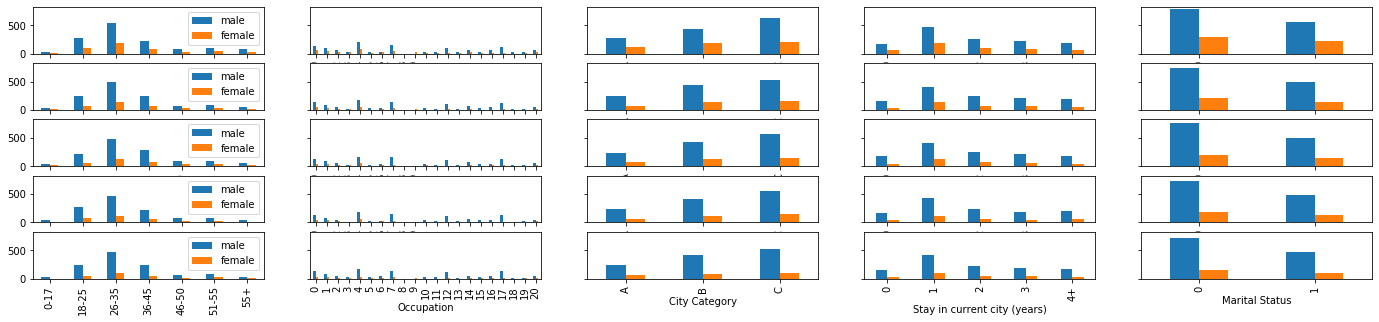

In [24]:
data_products = data.groupby(['Product_ID']).count().sort_values(by='Purchase', ascending=False)
fig, axes = plt.subplots(nrows=5, ncols=5, sharey=True, figsize=(24,5))

print(data_products.index.tolist()[:5])

for i,product_id in enumerate(data_products.index.tolist()[:5]):
    data_product = data[data.Product_ID == product_id]
    #print(data_product)
    df = pd.DataFrame({'male': pd.value_counts(data_product[data_product.Gender == 'M']['Age']).values,'female': pd.value_counts(data_product[data_product.Gender == 'F']['Age']).values}, index=pd.value_counts(data_product['Age']).index)
    plot = df.sort_index().plot.bar(ax=axes[i,0])
    axes[4,1].set_xlabel("Age")
    df = pd.concat([pd.value_counts(data_product[data_product.Gender == 'M']['Occupation']), pd.value_counts(data_product[data_product.Gender == 'F']['Occupation'])], axis=1)
    plot = df.sort_index().plot.bar(ax=axes[i,1], legend=None)
    axes[4,1].set_xlabel("Occupation")
    df = pd.concat([pd.value_counts(data_product[data_product.Gender == 'M']['City_Category']), pd.value_counts(data_product[data_product.Gender == 'F']['City_Category'])], axis=1)
    plot = df.sort_index().plot.bar(ax=axes[i,2], legend=None)
    axes[4,2].set_xlabel("City Category")
    df = pd.DataFrame({'male': pd.value_counts(data_product[data_product.Gender == 'M']['Stay_In_Current_City_Years']).values,'female': pd.value_counts(data_product[data_product.Gender == 'F']['Stay_In_Current_City_Years']).values}, index=pd.value_counts(data_product['Stay_In_Current_City_Years']).index)
    plot = df.sort_index().plot.bar(ax=axes[i,3], legend=None)
    axes[4,3].set_xlabel("Stay in current city (years)")
    df = pd.concat([pd.value_counts(data_product[data_product.Gender == 'M']['Marital_Status']), pd.value_counts(data_product[data_product.Gender == 'F']['Marital_Status'])], axis=1)
    plot = df.sort_index().plot.bar(ax=axes[i,4], legend=None)
    axes[4,4].set_xlabel("Marital Status")

plt.savefig('bestsellers.pdf', format='pdf', dpi=300, bbox_inches='tight')

Do the same for cumulated sales across product categories